# HR_Employee Project.

Author: Prasad Patharvat

1 Prepare data for Analysis, Treat Missing Data, Wrong Data, Outlier Data


2 Create new/derived predictors (e.g. Age group) for analysis

3 Explore the Data using Exploratory Data Analysis - For Y and all Xs

4 Explore the Data using Exploratory Data Analysis - For pairs of Y and all Xs

5 Visualize all the distribution, relationships

6 Perform Test of Hypothesis - Compare rates for same level male and female, check relationship between categorical variables like Age and Gender/Gender and Education Field, Age and Income, etc

Note: Use Test Data set and perform Cross Validation for selecting best model using Training Data

7 Form Classification Model using Y=attrition and choose the best model:

                                                 1) Logistic Regression

                                                 2) Decision Tree Classifer

                                                 3) Randomm Forest

                                                 4) AdaBoost
                                                        
                                                 5) KNN Classifer

# Import Libraries

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Read Dataset

In [3]:
A = pd.read_csv("C:Desktop/HR_Attrition_Employee.csv")

In [4]:
A.sample(10)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1447,0,36,Non-Travel,301,Sales,15,4,Marketing,1,2036,...,1,80,1,15,4,2,15,12,11,11
1163,0,37,Travel_Rarely,1470,Research & Development,10,3,Medical,1,1640,...,1,80,1,8,2,1,8,4,7,7
1400,0,38,Travel_Frequently,1444,Human Resources,1,4,Other,1,1972,...,2,80,1,7,2,3,6,2,1,2
785,0,40,Travel_Rarely,1492,Research & Development,20,4,Technical Degree,1,1092,...,4,80,1,14,6,3,11,10,11,1
200,0,27,Travel_Frequently,472,Research & Development,1,1,Technical Degree,1,274,...,3,80,1,6,1,3,2,2,2,0
1047,0,33,Travel_Frequently,430,Sales,7,3,Medical,1,1477,...,1,80,2,5,2,3,4,3,0,3
80,0,30,Travel_Rarely,852,Research & Development,1,1,Life Sciences,1,104,...,3,80,2,10,1,2,10,8,3,0
1083,1,40,Travel_Rarely,676,Research & Development,9,4,Life Sciences,1,1534,...,2,80,0,15,3,1,5,4,1,0
1253,0,33,Non-Travel,1283,Sales,2,3,Marketing,1,1756,...,4,80,0,13,2,2,11,7,1,7
31,0,44,Travel_Rarely,1459,Research & Development,10,4,Other,1,40,...,4,80,0,9,5,4,4,2,1,3


In [5]:
#head()
#tail()

In [6]:
#The Distribution of data
A.describe()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.161224,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,0.367863,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,0.000000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,0.000000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
A.shape

(1470, 35)

# Missing Data Treatment

In [9]:
A.isna().sum()

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
#Missing data not available 

# EDA (Explortory Data Analysis)

Check skew

In [11]:
A.skew()

Attrition                   1.844366
Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
d

In [12]:
#No skew in data

In [13]:
#Check Correlation

A.corr()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,1.000000,-0.159205,-0.056652,0.077924,-0.031373,NaN,-0.010577,-0.103369,-0.006846,-0.130016,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
Age,-0.159205,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,-0.056652,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,0.077924,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,-0.031373,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010577,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,-0.103369,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,-0.006846,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,-0.130016,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


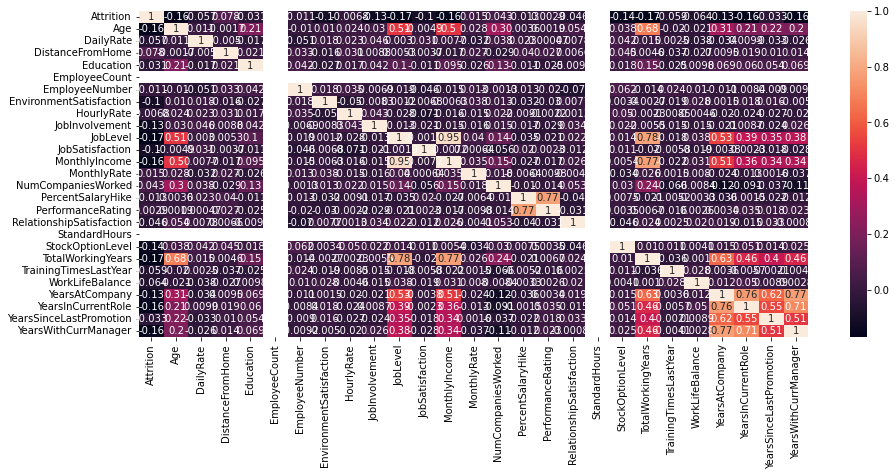

In [14]:
plt.figure(figsize=(15,6))
sb.heatmap(A.corr(),annot = True)
plt.show()

In [15]:
A.corr()[["Attrition"]].sort_values(by="Attrition")

,Attrition
TotalWorkingYears,-0.171063
JobLevel,-0.169105
YearsInCurrentRole,-0.160545
MonthlyIncome,-0.159840
Age,-0.159205
YearsWithCurrManager,-0.156199
StockOptionLevel,-0.137145
YearsAtCompany,-0.134392
JobInvolvement,-0.130016
JobSatisfaction,-0.103481


In [16]:
def catcon(A):
    cat = []
    con = []
    for i in A.columns:
        if(A[i].dtype == "object"):
            cat.append(i)
        else:
            con.append(i)
            
    return cat,con       

In [17]:
def UNIVARIATE(A,m,n):
    import matplotlib.pyplot as plt
    import seaborn as sb
    from warnings import filterwarnings
    filterwarnings("ignore")
    
    cat,con = catcon(A)
    plt.figure(figsize=(m,n))
    A_columns = A.shape[1]
    rows = 2
    columns = int(A_columns/2)+1
    plot_no = 1
    for i in cat:
        plt.subplot(columns,rows,plot_no)
        sb.countplot(A[i])
        plot_no = plot_no + 1
    for i in con:
        plt.subplot(columns,rows,plot_no)
        sb.distplot(A[i])
        plot_no = plot_no + 1

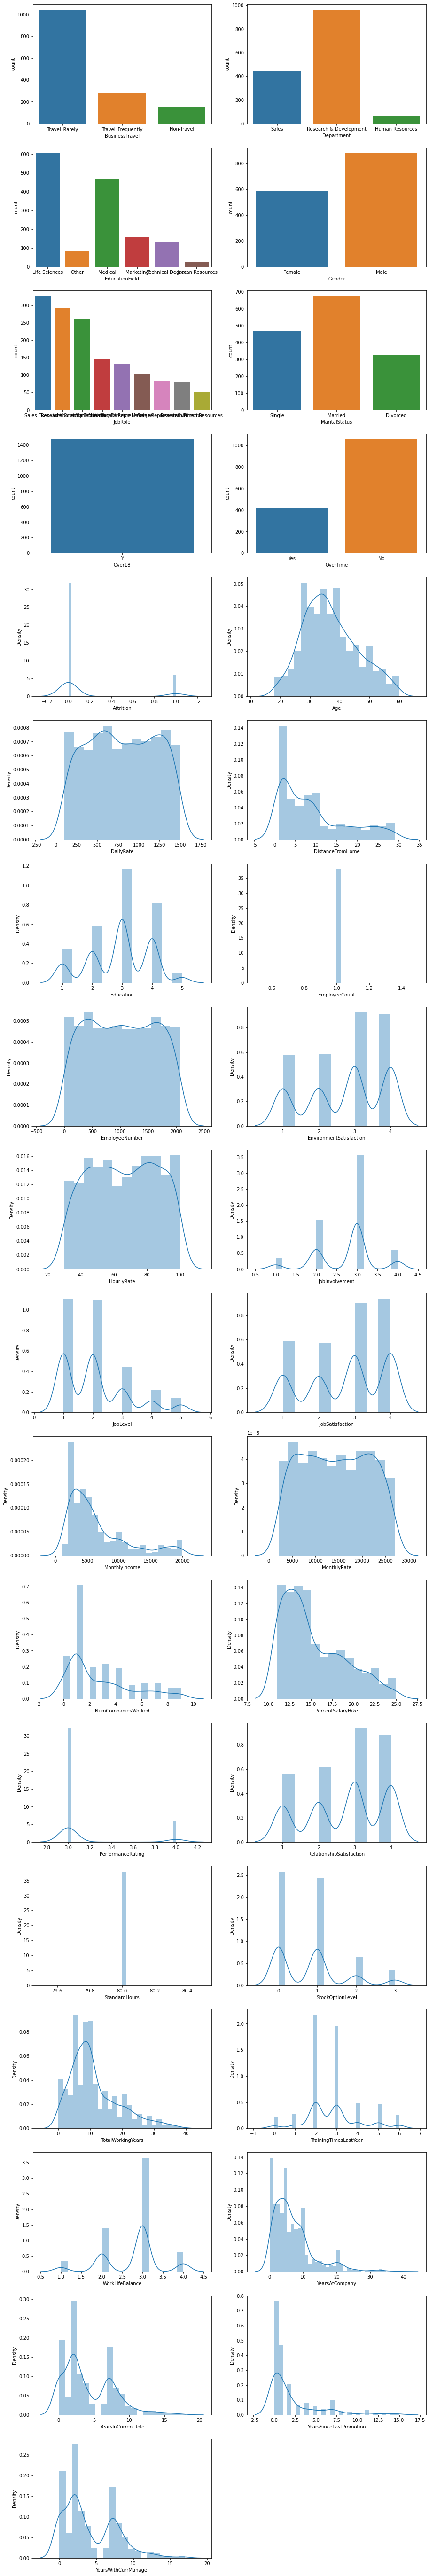

In [18]:
UNIVARIATE(A,15,100)

In [19]:
def BIVARIATE(A,m,n):
    import matplotlib.pyplot as plt
    import seaborn as sb
    from warnings import filterwarnings
    filterwarnings("ignore")
    cat,con = catcon(A)
    plt.figure(figsize=(m,n))
    tot_columns = A.shape[1]
    rows = 2
    columns = int(tot_columns/2)+1
    plot_no = 1
    for i in con:
        plt.figure(figsize=(5,5))
        sb.barplot(A.Attrition,A[i])
        plot_no = plot_no + 1
    for i in cat:
            plt.figure(figsize=(10,5))
            sb.boxplot(A[i],A.Attrition)
            plot_no = plot_no + 1

<Figure size 1080x7200 with 0 Axes>

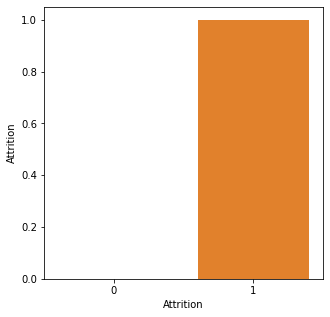

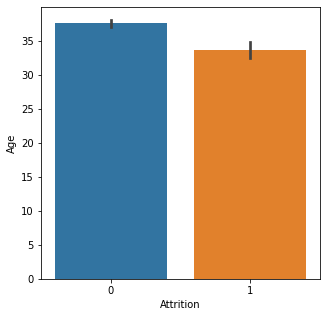

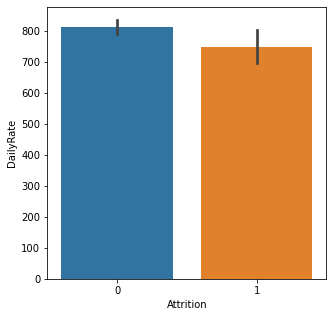

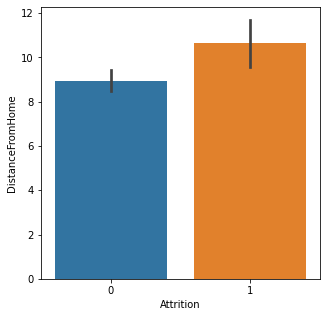

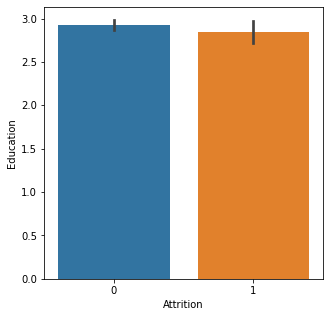

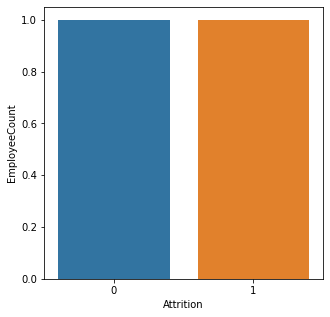

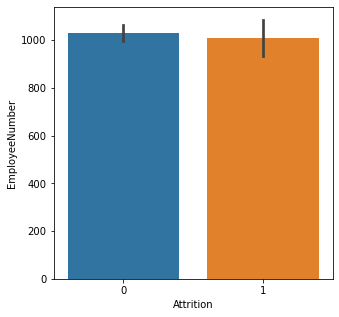

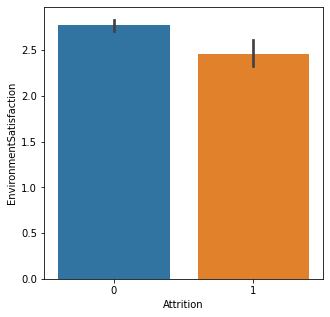

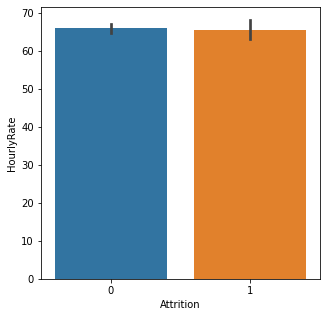

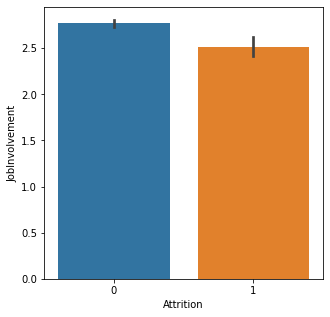

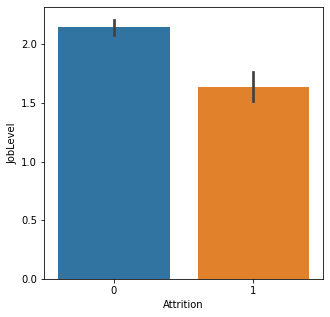

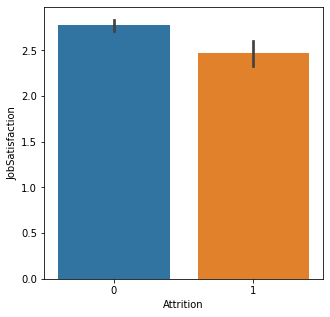

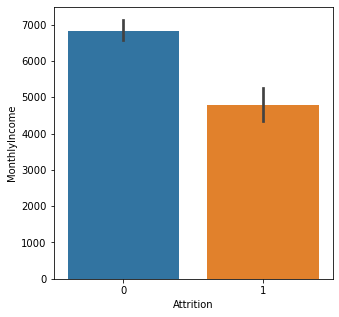

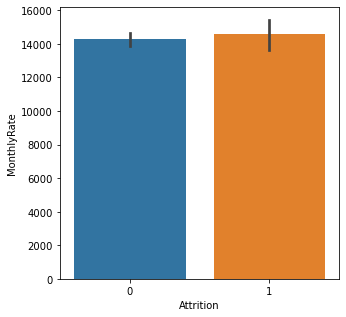

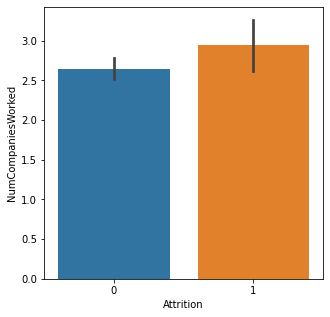

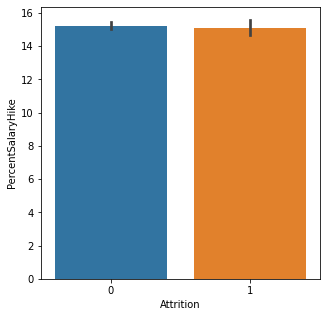

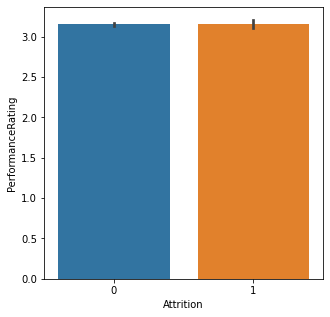

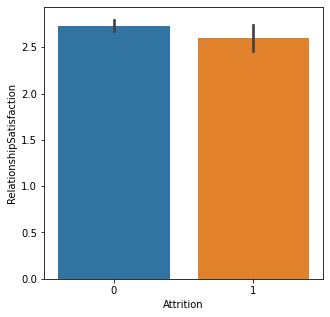

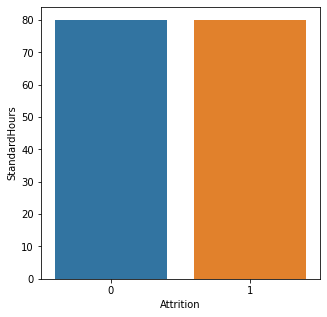

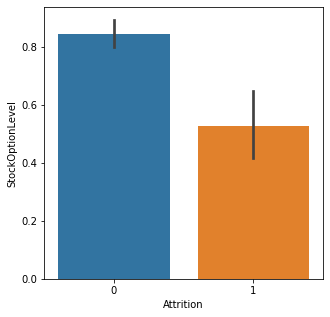

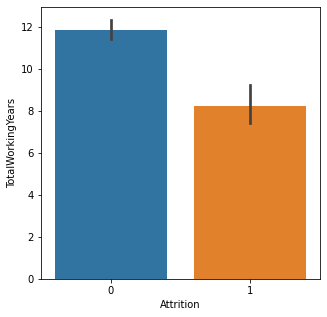

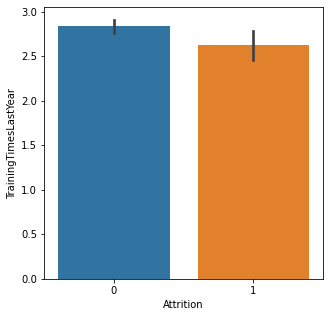

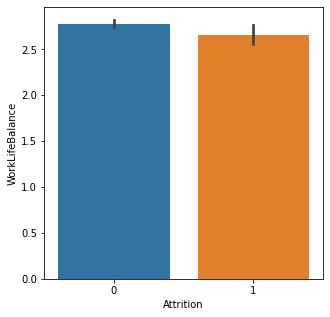

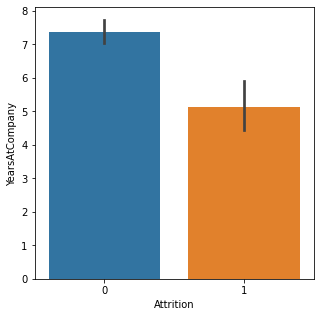

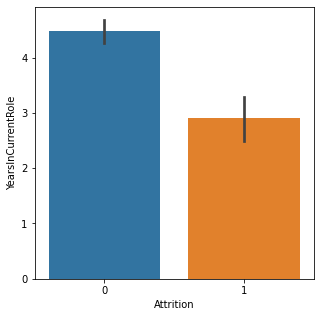

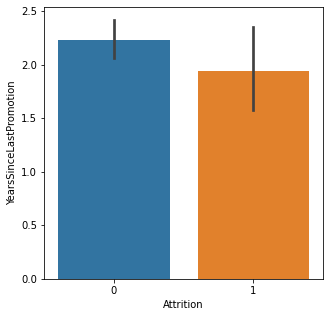

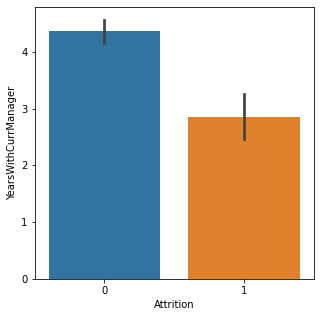

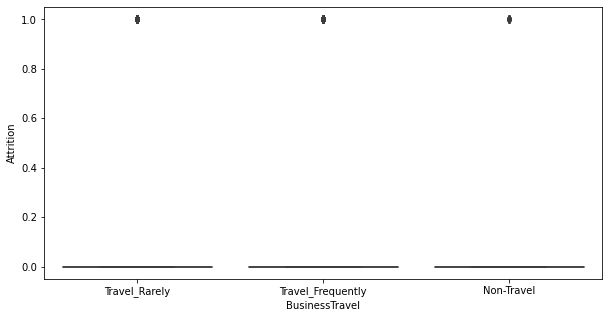

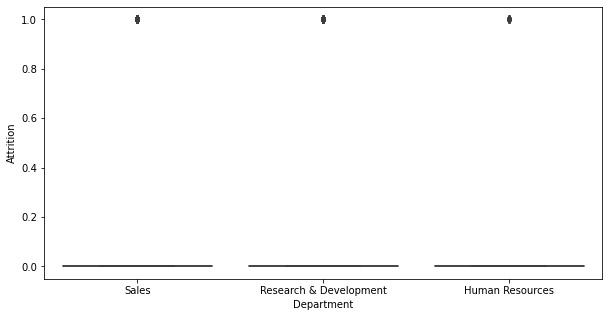

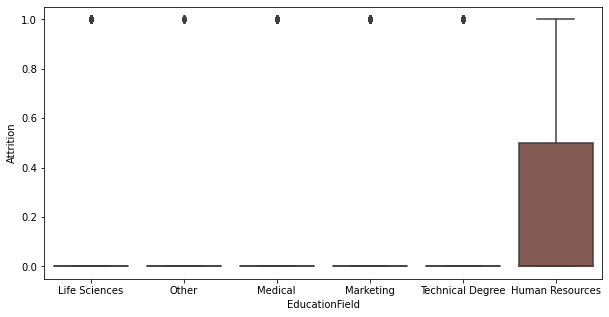

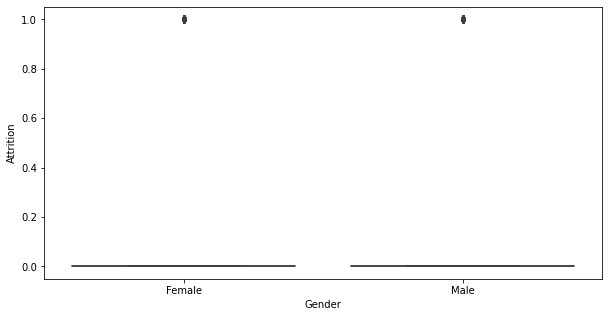

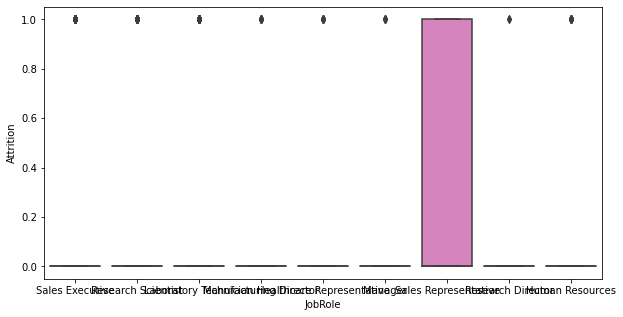

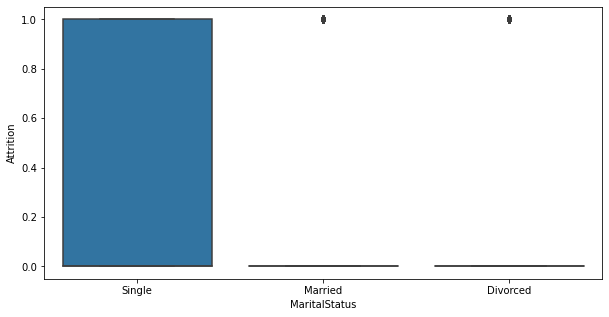

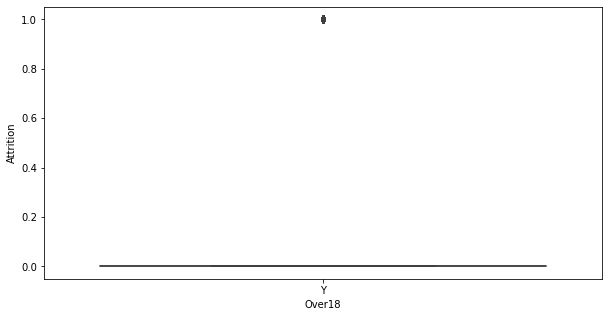

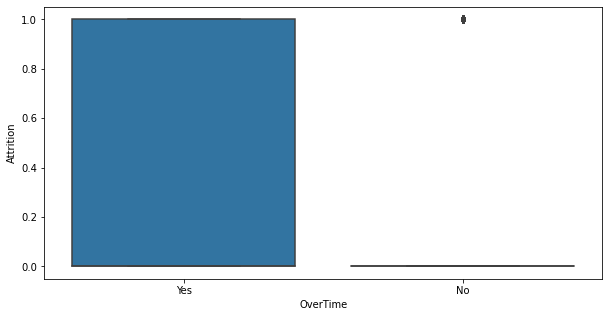

In [20]:
BIVARIATE(A,15,100)

# Feature Engineering & Selection

In [21]:
# ANOVA test for checking important continous features
cat = []
con = []
for i in A.columns:
    if(A[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)
        
def ANOVA(df,cat,con):
    from pandas import DataFrame
    from statsmodels.api import OLS
    from statsmodels.formula.api import ols
    rel = con + " ~ " + cat
    model = ols(rel,df).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results = anova_lm(model)
    Q = DataFrame(anova_results)
    a = Q['PR(>F)'][cat]
    return round(a,4)

imp_con_cols = []
for i in con :
    pval = ANOVA(A,i,"Attrition")
    print("Attrition vs ",i, ANOVA(A,i,"Attrition"))
    if(pval < 0.05 ):
        imp_con_cols.append(i)

Attrition vs  Attrition 0.0
Attrition vs  Age 0.0
Attrition vs  DailyRate 0.0299
Attrition vs  DistanceFromHome 0.0028
Attrition vs  Education 0.2293
Attrition vs  EmployeeCount 0.0227
Attrition vs  EmployeeNumber 0.6853
Attrition vs  EnvironmentSatisfaction 0.0001
Attrition vs  HourlyRate 0.7931
Attrition vs  JobInvolvement 0.0
Attrition vs  JobLevel 0.0
Attrition vs  JobSatisfaction 0.0001
Attrition vs  MonthlyIncome 0.0
Attrition vs  MonthlyRate 0.5611
Attrition vs  NumCompaniesWorked 0.0955
Attrition vs  PercentSalaryHike 0.6056
Attrition vs  PerformanceRating 0.9119
Attrition vs  RelationshipSatisfaction 0.0787
Attrition vs  StandardHours 0.0227
Attrition vs  StockOptionLevel 0.0
Attrition vs  TotalWorkingYears 0.0
Attrition vs  TrainingTimesLastYear 0.0226
Attrition vs  WorkLifeBalance 0.0142
Attrition vs  YearsAtCompany 0.0
Attrition vs  YearsInCurrentRole 0.0
Attrition vs  YearsSinceLastPromotion 0.2058
Attrition vs  YearsWithCurrManager 0.0


In [22]:
imp_con_cols

['Attrition',
 'Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

In [23]:
def chisquare(df,cat1,cat2):
    from scipy.stats import chi2_contingency
    import pandas as pd
    ct = pd.crosstab(df[cat1],df[cat2])
    a,b,c,d = chi2_contingency(ct)
    return b

In [24]:
imp_cat_cols = []
for i in A.columns:
    if(A[i].dtype == "object"):
        x = chisquare(A,"Attrition",i)
        if(x<0.05):
            imp_cat_cols.append(i)
            print("Attrition vs ",i,"----->",A)

Attrition vs  BusinessTravel ----->       Attrition  Age     BusinessTravel  DailyRate              Department  \
0             1   41      Travel_Rarely       1102                   Sales   
1             0   49  Travel_Frequently        279  Research & Development   
2             1   37      Travel_Rarely       1373  Research & Development   
3             0   33  Travel_Frequently       1392  Research & Development   
4             0   27      Travel_Rarely        591  Research & Development   
...         ...  ...                ...        ...                     ...   
1465          0   36  Travel_Frequently        884  Research & Development   
1466          0   39      Travel_Rarely        613  Research & Development   
1467          0   27      Travel_Rarely        155  Research & Development   
1468          0   49  Travel_Frequently       1023                   Sales   
1469          0   34      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Edu

In [25]:
imp_cols = []
imp_cols.extend(imp_con_cols)
imp_cols.extend(imp_cat_cols)

In [26]:
imp_cols.remove("Attrition")

In [27]:
#imp_cols

# Define X and Y

In [28]:
Y = A[["Attrition"]]
X = A.drop(["Attrition"],axis=1)

In [29]:
Y_original = Y[["Attrition"]]

In [30]:
len(X.columns)

34

In [31]:
len(X[imp_cols].columns)

23

In [32]:
X = X[imp_cols]

In [33]:
len(X.columns)

23

# Data Preprocessing 

Using One Hot Encoding for catgorical columns and StandardScaler for Continous 

In [34]:
def preprocessing(df):
    import pandas as pd 
    cat = []
    con = []
    for i in df.columns:
        if(df[i].dtypes == "object"):
            cat.append(i)
            
        else:
            con.append(i)
            
    X1 = pd.get_dummies(df[cat])
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    X2 = pd.DataFrame(ss.fit_transform(df[con]),columns=con)
    X3 = X2.join(X1)
    return X3   

In [35]:
Xnew = preprocessing(X)

# Outliers Treatment

In [36]:
def outliers(df):
    T = []
    for i in range(0,len(df.columns)):
        for j in range(0,df.shape[0]):
            x = df.iloc[j,i]
            if((x>3)or(x<-3)):
                T.append(j)

    from numpy import unique
    rows_del = list(unique(T))
    return rows_del

In [37]:
outliers = outliers(Xnew)

In [38]:
outliers

[28,
 62,
 63,
 85,
 98,
 123,
 126,
 153,
 187,
 190,
 231,
 237,
 270,
 281,
 386,
 401,
 411,
 425,
 445,
 466,
 473,
 477,
 561,
 592,
 595,
 616,
 624,
 635,
 653,
 677,
 686,
 716,
 746,
 749,
 861,
 875,
 894,
 914,
 918,
 926,
 956,
 962,
 976,
 1024,
 1043,
 1078,
 1086,
 1111,
 1116,
 1135,
 1138,
 1184,
 1301,
 1327,
 1348,
 1351,
 1401,
 1430]

In [39]:
Xnew = Xnew.drop(outliers)

In [40]:
Y = Y.drop(outliers)

In [41]:
import pandas as pd

#set index
index = pd.Index(range(0,1412,1))
Xnew = Xnew.set_index(index)
print(Xnew)

           Age  DailyRate  DistanceFromHome  EmployeeCount  \
0     0.446350   0.742527         -1.010909            0.0   
1     1.322365  -1.297775         -0.147150            0.0   
2     0.008343   1.414363         -0.887515            0.0   
3    -0.429664   1.461466         -0.764121            0.0   
4    -1.086676  -0.524295         -0.887515            0.0   
...        ...        ...               ...            ...   
1407 -0.101159   0.202082          1.703764            0.0   
1408  0.227347  -0.469754         -0.393938            0.0   
1409 -1.086676  -1.605183         -0.640727            0.0   
1410  1.322365   0.546677         -0.887515            0.0   
1411 -0.320163  -0.432568         -0.147150            0.0   

      EnvironmentSatisfaction  JobInvolvement  JobLevel  JobSatisfaction  \
0                   -0.660531        0.379672 -0.057788         1.153254   
1                    0.254625       -1.026167 -0.057788        -0.660853   
2                    1.1697

In [42]:
import pandas as pd


# set index
index = pd.Index(range(0, 1412, 1))
Y = Y.set_index(index)
#print(Y)

# Divide data in Training & Testing Set

In [43]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# Create Logistic Regression  Model

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the
relationship between the categorical dependent variable (feature) and one or more independent
variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic
distribution.

In [44]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
model_log_reg = log_reg.fit(xtrain,ytrain)

pred_tr = model_log_reg.predict(xtrain)
pred_ts = model_log_reg.predict(xtest)

from sklearn.metrics import confusion_matrix,accuracy_score
tr_acc_log_reg = accuracy_score(ytrain,pred_tr)
ts_acc_log_reg = accuracy_score(ytest,pred_ts)

print("training_accuracy_log_reg :", tr_acc_log_reg)
print("testing_accuracy_log_reg :", ts_acc_log_reg)

training_accuracy_log_reg : 0.895482728077945
testing_accuracy_log_reg : 0.8515901060070671


In [45]:
confusion_matrix(ytrain,pred_tr)

array([[924,  22],
       [ 96,  87]], dtype=int64)

In [46]:
confusion_matrix(ytest,pred_ts)

array([[229,   4],
       [ 38,  12]], dtype=int64)

# 

# Create Decision Tree Classifer Model

This model uses a decision tree as a predictive model which maps features (tree branches) to
conclusions about the target value (tree leaves). Tree models where the target variable can take a
finite set of values are called classification trees; in these tree structures, leaves represent class labels
and branches represent conjunctions of features that lead to those class labels. Decision trees where
the target variable can take continuous values (typically real numbers) are called regression trees.
The model confidence score is the highest among models evaluated so far.

In [48]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21)
model_dtc = dtc.fit(xtrain,ytrain)

predtr1 = model_dtc.predict(xtrain)
predts2 = model_dtc.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc_dec_tree = accuracy_score(ytrain,predtr1)
ts_acc_dec_tree = accuracy_score(ytest,predts2)

print("training_accuracy_dec_tree :", tr_acc_dec_tree)
print("testing_accuracy_dec_tree :", ts_acc_dec_tree)

training_accuracy_dec_tree : 1.0
testing_accuracy_dec_tree : 0.8268551236749117


# Decision Tree Model has good training accuracy but give bad testing accuracy - model is overfitted

In [50]:
from sklearn.model_selection import GridSearchCV
tg = {"min_samples_leaf":range(2,60,1)}
dtc = DecisionTreeClassifier(random_state=21)

cv = GridSearchCV(dtc,tg,scoring="accuracy",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'min_samples_leaf': 23}

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,min_samples_leaf=23)
model_dtc1 = dtc.fit(xtrain,ytrain)

predtr1 = model_dtc1.predict(xtrain)
predts1 = model_dtc1.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc_dec_tree_leaf = accuracy_score(ytrain,predtr1)
ts_acc_dec_tree_leaf = accuracy_score(ytest,predts1)

print("training_accuracy_dec_tree_leaf :", tr_acc_dec_tree_leaf)
print("testing_accuracy_dec_tree_leaf :", ts_acc_dec_tree_leaf)

training_accuracy_dec_tree_leaf : 0.8759964570416298
testing_accuracy_dec_tree_leaf : 0.8268551236749117


In [52]:
from sklearn.model_selection import GridSearchCV
tg = {"min_samples_split":range(2,15,1)}
dtc = DecisionTreeClassifier(random_state=21)

cv = GridSearchCV(dtc,tg,scoring="accuracy",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'min_samples_split': 14}

In [53]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,min_samples_split=14)
model_dtc_split = dtc.fit(xtrain,ytrain)

predtr1 = model_dtc_split.predict(xtrain)
predts1 = model_dtc_split.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc_dec_tree_split = accuracy_score(ytrain,predtr1)
ts_acc_dec_tree_split = accuracy_score(ytest,predts1)

print("training_accuracy_dec_tree_split :", tr_acc_dec_tree_split)
print("testing_accuracy_dec_tree_split :", ts_acc_dec_tree_split)

training_accuracy_dec_tree_split : 0.9255978742249779
testing_accuracy_dec_tree_split : 0.8268551236749117


In [54]:
from sklearn.model_selection import GridSearchCV
tg = {"max_depth":range(2,15,1)}
dtc = DecisionTreeClassifier(random_state=21)

cv = GridSearchCV(dtc,tg,scoring="accuracy",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'max_depth': 3}

In [55]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,max_depth=3)
model_dtc_maxdepth = dtc.fit(xtrain,ytrain)

predtr1 = model_dtc_maxdepth.predict(xtrain)
predts1 = model_dtc_maxdepth.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc_maxdepth = accuracy_score(ytrain,predtr1)
ts_acc_maxdepth = accuracy_score(ytest,predts1)


print("training_accuracy_dec_tree :", tr_acc_maxdepth)
print("testing_accuracy_dec_tree :", ts_acc_maxdepth)

training_accuracy_dec_tree : 0.8609388839681134
testing_accuracy_dec_tree : 0.8303886925795053


# Random Forest Classifier Model

The next model Random Forests is one of the most popular. Random forests or random decision
forests are an ensemble learning method for classification, regression and other tasks, that operate by
constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class
that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.
The model confidence score is the highest among models evaluated so far.

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=21)
model_rfc = rfc.fit(xtrain,ytrain)

predtr2 = model_rfc.predict(xtrain)
predts2 = model_rfc.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc_rf = accuracy_score(ytrain,predtr2)
ts_acc_rf = accuracy_score(ytest,predts2)

print("training_accuracy_rf :", tr_acc_rf)
print("testing_accuracy_rf :", ts_acc_rf)

training_accuracy_rf : 1.0
testing_accuracy_rf : 0.8586572438162544


# Random Forest Model has good training accuracy but give bad testing accuracy - model is overfitted

#so we use prunning to overcome this overfitting, for that we use "n_estimators" Hyperparameter


In [57]:
from sklearn.model_selection import GridSearchCV
tg = {"n_estimators":range(2,100,1)}
rfc = RandomForestClassifier(random_state = 21)
cv1 = GridSearchCV(rfc,tg,scoring="accuracy",cv=4)
cvmodel1 = cv1.fit(xtrain,ytrain)
cvmodel1.best_params_

{'n_estimators': 79}

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=79,random_state = 21,min_samples_leaf=25)
model_rfc1 = rfc.fit(xtrain,ytrain)

predtr2 = model_rfc1.predict(xtrain)
predts2 = model_rfc1.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc2 = accuracy_score(ytrain,predtr2)
ts_acc2 = accuracy_score(ytest,predts2)

print("training_accuracy_rf :", tr_acc_rf)
print("testing_accuracy_rf :", ts_acc_rf)

training_accuracy_rf : 1.0
testing_accuracy_rf : 0.8586572438162544


# AdaBoost Regressor Model

AdaBoost also called Adaptive Boosting is a technique in Machine Learning used as an Ensemble
Method. The most common algorithm used with AdaBoost is decision trees with one level that means
with Decision trees with only 1 split. These trees are also called Decision Stumps

In [59]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(DecisionTreeClassifier(random_state=21))
model_abc = abc.fit(xtrain,ytrain)

predtr3 = model_abc.predict(xtrain)
predts3 = model_abc.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc_abc = accuracy_score(ytrain,predtr3)
ts_acc_abc = accuracy_score(ytest,predts3)

print("training_accuracy_abc :", tr_acc_abc)
print("testing_accuracy_abc :", ts_acc_abc)

training_accuracy_abc : 1.0
testing_accuracy_abc : 0.8162544169611308


# Adaboost Model has good training accuracy but give bad testing accuracy - model is overfitted

so we use prunning to overcome this overfitting, for that we use "n_estimators" Hyperparameter


In [60]:
from sklearn.model_selection import GridSearchCV
tg = {"n_estimators":range(2,100,1)}
abc = AdaBoostClassifier(DecisionTreeClassifier(random_state=21))

cv1 = GridSearchCV(abc,tg,scoring="accuracy",cv=4)
cvmodel2 = cv1.fit(xtrain,ytrain)
cvmodel2.best_params_

{'n_estimators': 17}

In [61]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(DecisionTreeClassifier(random_state=21,min_samples_leaf=25),n_estimators=51)
model_abc_estimator = abc.fit(xtrain,ytrain)

predtr3 = model_abc_estimator.predict(xtrain)
predts3 = model_abc_estimator.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc_abc = accuracy_score(ytrain,predtr3)
tr_acc_abc = accuracy_score(ytest,predts3)

print("training_accuracy_abc :", tr_acc_abc)
print("testing_accuracy_abc :", ts_acc_abc)

training_accuracy_abc : 0.8480565371024735
testing_accuracy_abc : 0.8162544169611308


# KNN Model

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric
method used for classification and regression. A sample is classified by a majority vote of its neighbors,
with the sample being assigned to the class most common among its k nearest neighbors (k is a
positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single
nearest neighbor.

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
model = knc.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_knn_acc = accuracy_score(ytrain,pred_tr)
ts_knn_acc = accuracy_score(ytest,pred_ts)

print("training error:",tr_knn_acc)
print("testing error:",ts_knn_acc)

training error: 0.8671390611160319
testing error: 0.8374558303886925


# KNN Model has good training accuracy but give bad testing accuracy - model is overfitted

so we use prunning to overcome this overfitting, for that we use "n_neighbors " Hyperparameter


In [68]:
from sklearn.model_selection import GridSearchCV
tg = {"n_neighbors":range(2,15,1)}
knn = KNeighborsClassifier()

cv = GridSearchCV(knn,tg,scoring="accuracy",cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'n_neighbors': 7}

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
model = knc.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_knn_acc = accuracy_score(ytrain,pred_tr)
ts_knn_acc = accuracy_score(ytest,pred_ts)

print("training error:",tr_knn_acc)
print("testing error:",ts_knn_acc)

training error: 0.8671390611160319
testing error: 0.8374558303886925


# Model Evaluation

We can now rank our evaluation of all the models to choose the best one for our problem

In [87]:
model_eval = pd.DataFrame({'Model': ['KNN','Decision Tree','Random Forest','AdaBoost','Logistic Regression']})        

In [88]:
model_tr1 = pd.DataFrame({'Tr_Score': [tr_knn_acc,tr_acc_dec_tree,tr_acc_rf,tr_acc_abc,tr_acc_log_reg]})

In [92]:
model_ts2 = pd.DataFrame({'Ts_score': [ts_knn_acc,ts_acc_dec_tree,ts_acc_rf,ts_acc_abc,ts_acc_log_reg]})

In [95]:
Evalution = model_eval.join(model_tr1)

In [96]:
Evalution 

,Model,Tr_Score
0,KNN,0.867139
1,Decision Tree,1.000000
2,Random Forest,1.000000
3,AdaBoost,0.848057
4,Logistic Regression,0.895483


In [97]:
Evalution = Evalution.join(model_ts2)

In [98]:
Evalution

,Model,Tr_Score,Ts_score
0,KNN,0.867139,0.837456
1,Decision Tree,1.000000,0.826855
2,Random Forest,1.000000,0.858657
3,AdaBoost,0.848057,0.816254
4,Logistic Regression,0.895483,0.851590
